In [ ]:
!mkdir ../aim2/output_month
!unzip ../dataset.zip

In [ ]:
!mkdir ../kaggle
!mkdir ../kaggle/input
!cp ../dataset/*.csv ../kaggle/input/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

###### cities_day has the day-wise data of all the cities except Ujjain and Pithampura 

In [2]:
cities_day=pd.read_csv("../kaggle/input/city_day.csv")

###### cities_day_new has the day-wise data from July 2020 to September 2020

In [3]:
cities_day_new = pd.read_csv("../aim2/aim2_data/city_day.csv")

In [4]:
cities_day_new['month']= cities_day_new.apply(lambda row : int(row['Date'].split('-')[1]), axis=1)
cities_day_new = cities_day_new.drop(cities_day_new[cities_day_new['month'] < 7].index).reset_index(drop = True)
cities_day_new = cities_day_new.drop(cities_day_new[cities_day_new['month'] > 9].index).reset_index(drop = True)

In [9]:
#drop the columns which are not required
cities_day=cities_day.drop(columns=['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene','AQI_Bucket'])

In [13]:
cities = []
cities = cities_day['City'].unique().tolist()
#cities_list is a list of 20 cities excluding Ujjain and Pithampura that are being considered
cities_list = [x for x in cities if x != 'Chandigarh' and x != 'Aizawl' and x != 'Shillong' and x != 'Bhopal' and x != 'Kochi' and x != 'Ernakulam']

##### function to create csv files for a city containing monthwise aqi values prior, during and after lockdown

In [19]:
def func(city_name):
    city_day= cities_day[cities_day['City']==city_name][['Date','AQI']].reset_index()
    city_day['year']= city_day.apply(lambda row : row['Date'].split('-')[0], axis=1)
    city_day_2020= city_day[city_day['year']=='2020']
    city_day_2019= city_day[city_day['year']=='2019']
    city_day_2020['month']= city_day_2020.apply(lambda row : int(row['Date'].split('-')[1]), axis=1)
    city_day_2019['month']= city_day_2019.apply(lambda row : int(row['Date'].split('-')[1]), axis=1)
    city_day_2019 = city_day_2019[['month', 'AQI']].drop(city_day_2019[city_day_2019['month'] < 11].index).reset_index(drop = True)
    
    
    city_day_2020_janfeb = city_day_2020[['month', 'AQI']].drop(city_day_2020[city_day_2020['month'] > 2].index).reset_index(drop = True)
    
    city_day_2020_march = city_day_2020[city_day_2020['month']==3]
    city_day_2020_march['day']= city_day_2020_march.apply(lambda row : int(row['Date'].split('-')[2]), axis=1)
    city_day_2020_march_pre = city_day_2020_march[['month', 'AQI']].drop(city_day_2020_march[city_day_2020_march['day'] > 20].index).reset_index(drop = True)
    
    #prior lockdown
    city_prior = city_day_2019.append(city_day_2020_janfeb, ignore_index = True) 
    city_prior = city_prior.append(city_day_2020_march_pre, ignore_index=True)
    
    
    city_day_in_march = city_day_2020_march[['month', 'AQI']].drop(city_day_2020_march[city_day_2020_march['day'] < 23].index).reset_index(drop = True)
    city_day_in = city_day_2020.drop(city_day_2020[city_day_2020['month'] < 4].index).reset_index(drop = True)
    city_day_in = city_day_in[['month', 'AQI']].drop(city_day_in[city_day_in['month'] > 5].index).reset_index(drop = True)
    
    #in lockdown
    city_day_in = city_day_in_march.append(city_day_in, ignore_index=True)
    city_in = city_day_in_march.append(city_day_in, ignore_index=True)
    
    #after lockdown
    city_day_after = city_day_2020[['month','AQI']].drop(city_day_2020[city_day_2020['month'] < 6].index).reset_index(drop = True)
    city_day_from_july = cities_day_new[cities_day_new['City']==city_name].reset_index()
    city_day_from_july = city_day_from_july[['month','AQI']].drop(0).reset_index(drop=True)
    city_after = city_day_after.append(city_day_from_july, ignore_index=True)
    
    
    #Interpolate AQI data 
    city_prior.interpolate(inplace = True)
    city_in.interpolate(inplace = True)
    city_after.interpolate(inplace = True)
    
    #calculate mean month-wise
    city_prior = city_prior.groupby(['month']).mean().reset_index()
    city_prior['month'] = city_prior.index +1
    
    city_in = city_in.groupby(['month']).mean().reset_index()
    city_in['month'] = city_in.index +1
    
    city_after = city_after.groupby(['month']).mean().reset_index()
    city_after['month'] = city_after.index +1
    
    #saving csv files
    city_prior.to_csv('../aim2/output_month/'+ city_name + '_prior_lockdown.csv', index=False, header= None)
    city_in.to_csv('../aim2/output_month/'+ city_name + '_in_lockdown.csv', index=False, header= None)
    city_after.to_csv('../aim2/output_month/'+ city_name + '_after_lockdown.csv', index=False, header = None)
    
    
    


In [20]:
for city_name in cities_list:
    func(city_name)

##### pithampur_ujjain has the data of two cities, Ujjain and Pithampura

In [21]:
pithampur_ujjain =pd.read_csv('../aim2/aim2_data/new_city_day.csv')

##### function to create csv files for Pithampura and Ujjain containing monthwise aqi values prior, during and after lockdown

In [23]:
def func_pithampur_ujjain(city_name):
    city_day= pithampur_ujjain[pithampur_ujjain['City']==city_name][['Date','AQI']].reset_index()
    city_day['year']= city_day.apply(lambda row : row['Date'].split('-')[0], axis=1)
    city_day_2020= city_day[city_day['year']=='2020']
    city_day_2019= city_day[city_day['year']=='2019']
    city_day_2020['month']= city_day_2020.apply(lambda row : int(row['Date'].split('-')[1]), axis=1)
    city_day_2019['month']= city_day_2019.apply(lambda row : int(row['Date'].split('-')[1]), axis=1)
    city_day_2019 = city_day_2019[['month', 'AQI']].drop(city_day_2019[city_day_2019['month'] < 11].index).reset_index(drop = True)
    
    
    city_day_2020_janfeb = city_day_2020[['month', 'AQI']].drop(city_day_2020[city_day_2020['month'] > 2].index).reset_index(drop = True)
    
    city_day_2020_march = city_day_2020[city_day_2020['month']==3]
    city_day_2020_march['day']= city_day_2020_march.apply(lambda row : int(row['Date'].split('-')[2]), axis=1)
    city_day_2020_march_pre = city_day_2020_march[['month', 'AQI']].drop(city_day_2020_march[city_day_2020_march['day'] > 20].index).reset_index(drop = True)
    
    #prior lockdown
    city_prior = city_day_2019.append(city_day_2020_janfeb, ignore_index = True) 
    city_prior = city_prior.append(city_day_2020_march_pre, ignore_index=True)
    
    city_day_in_march = city_day_2020_march[['month', 'AQI']].drop(city_day_2020_march[city_day_2020_march['day'] < 23].index).reset_index(drop = True)
    city_day_in = city_day_2020.drop(city_day_2020[city_day_2020['month'] < 4].index).reset_index(drop = True)
    city_day_in = city_day_in[['month', 'AQI']].drop(city_day_in[city_day_in['month'] > 5].index).reset_index(drop = True)
    
    #in lockdown
    city_day_in = city_day_in_march.append(city_day_in, ignore_index=True)
    city_in = city_day_in_march.append(city_day_in, ignore_index=True)
    
    #after lockdown
    city_after = city_day_2020[['month','AQI']].drop(city_day_2020[city_day_2020['month'] < 6].index).reset_index(drop = True)
    city_after = city_after.drop(city_after[city_after['month'] > 9].index).reset_index(drop = True)
    
    city_prior.interpolate(inplace = True)
    city_in.interpolate(inplace = True)
    city_after.interpolate(inplace = True)
    
    city_prior = city_prior.groupby(['month']).mean().reset_index()
    city_prior['month'] = city_prior.index +1
    
    #in lockdown
    city_in = city_in.groupby(['month']).mean().reset_index()
    city_in['month'] = city_in.index +1
    
    #calculate mean month-wise
    city_after = city_after.groupby(['month']).mean().reset_index()
    city_after['month'] = city_after.index +1
    
    #saving csv files
    city_prior.to_csv('../aim2/output_month/'+ city_name + '_prior_lockdown.csv', index=False, header= None)
    city_in.to_csv('../aim2/output_month/'+ city_name + '_in_lockdown.csv', index=False, header= None)
    city_after.to_csv('../aim2/output_month/'+ city_name + '_after_lockdown.csv', index=False, header = None)
    
    
    


In [24]:
#for city_name in ['Pithampur', 'Ujjain']:
func_pithampur_ujjain('Pithampur')
func_pithampur_ujjain('Ujjain')

In [25]:
list_cities =[ 'Ahmedabad', 'Amaravati', 'Amritsar', 'Bengaluru', 'Brajrajnagar', 'Chennai', 'Coimbatore',
               'Delhi', 'Gurugram', 'Guwahati', 'Hyderabad', 'Jaipur', 'Jorapokhar', 'Kolkata', 'Lucknow',
               'Mumbai', 'Patna', 'Pithampur', 'Talcher', 'Thiruvananthapuram',
               'Ujjain', 'Visakhapatnam']

#### plot the data

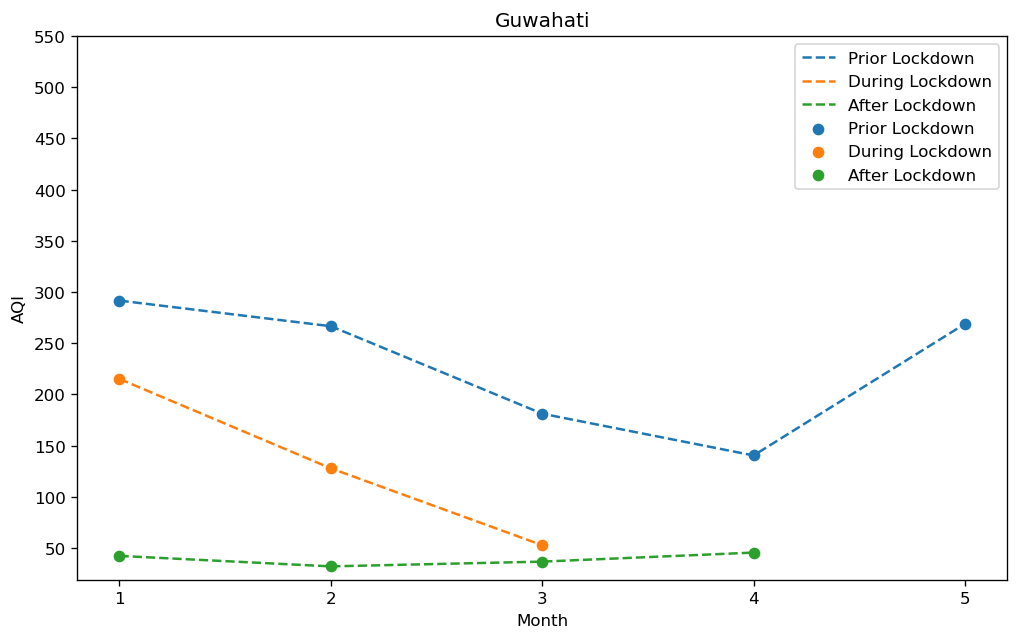

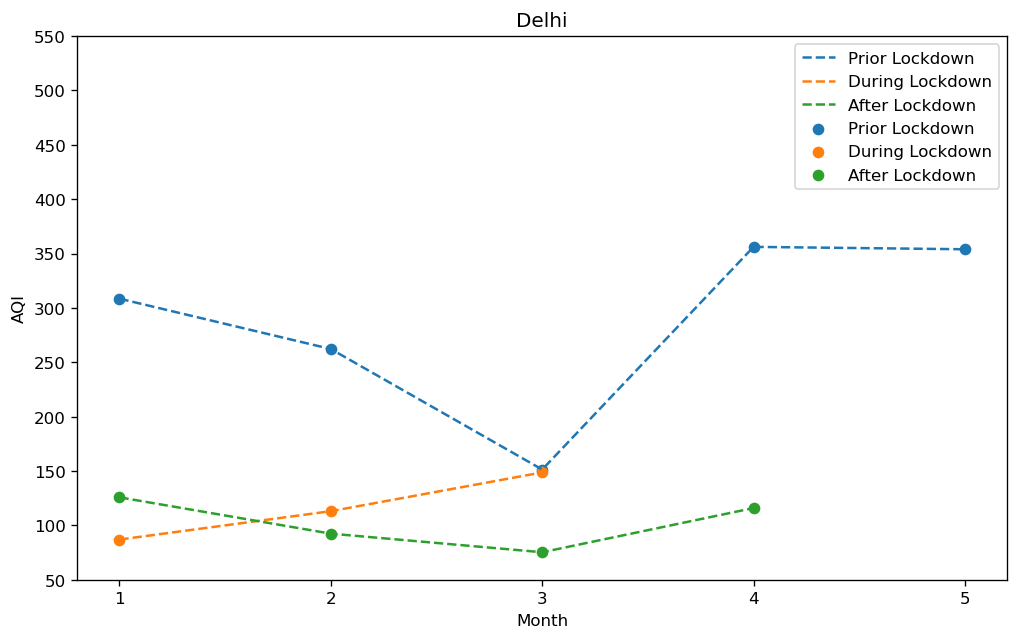

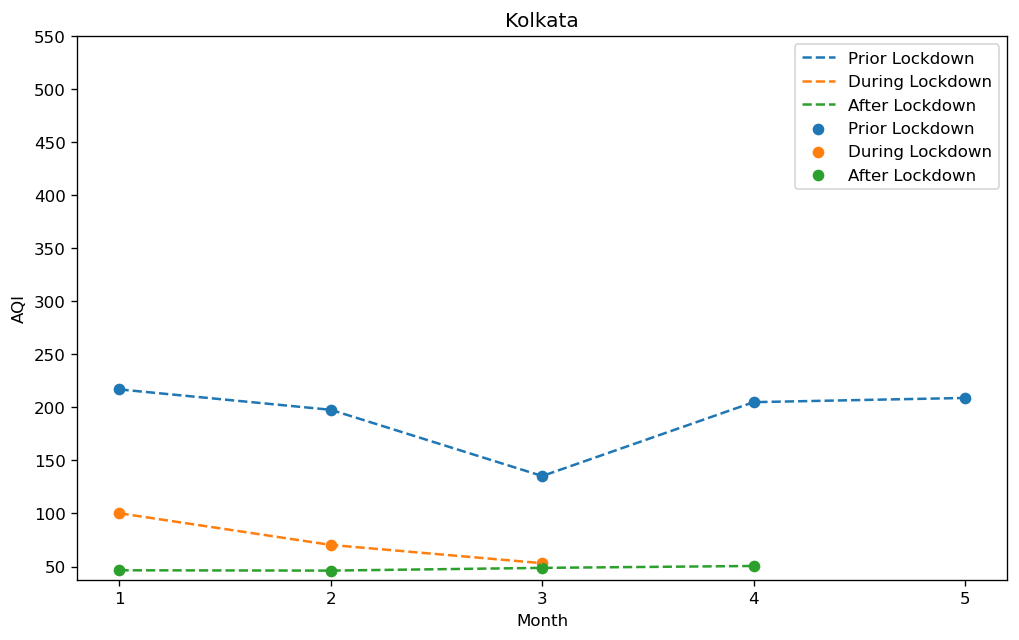

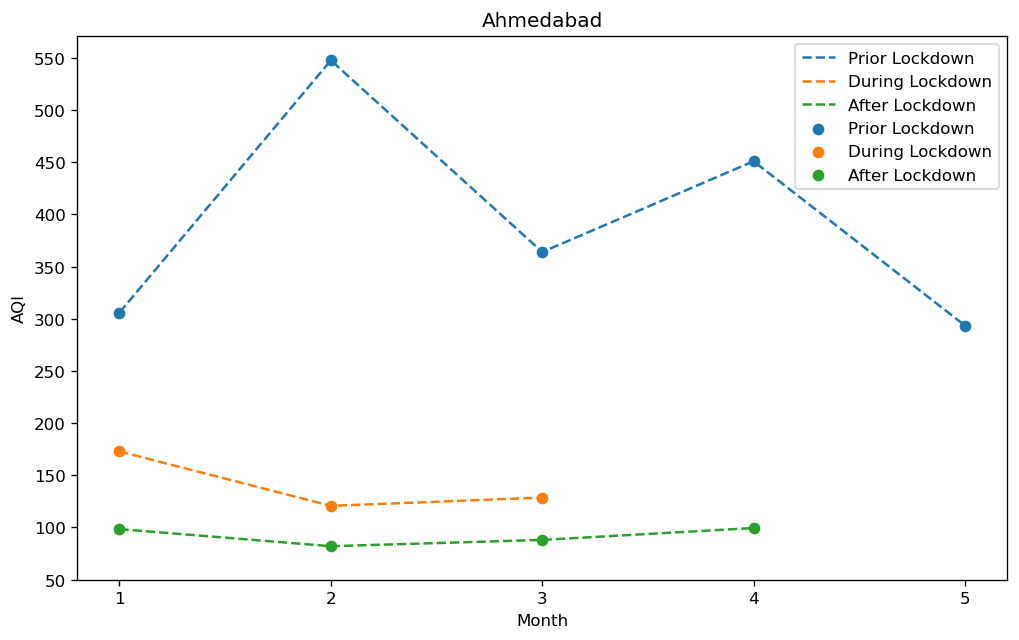

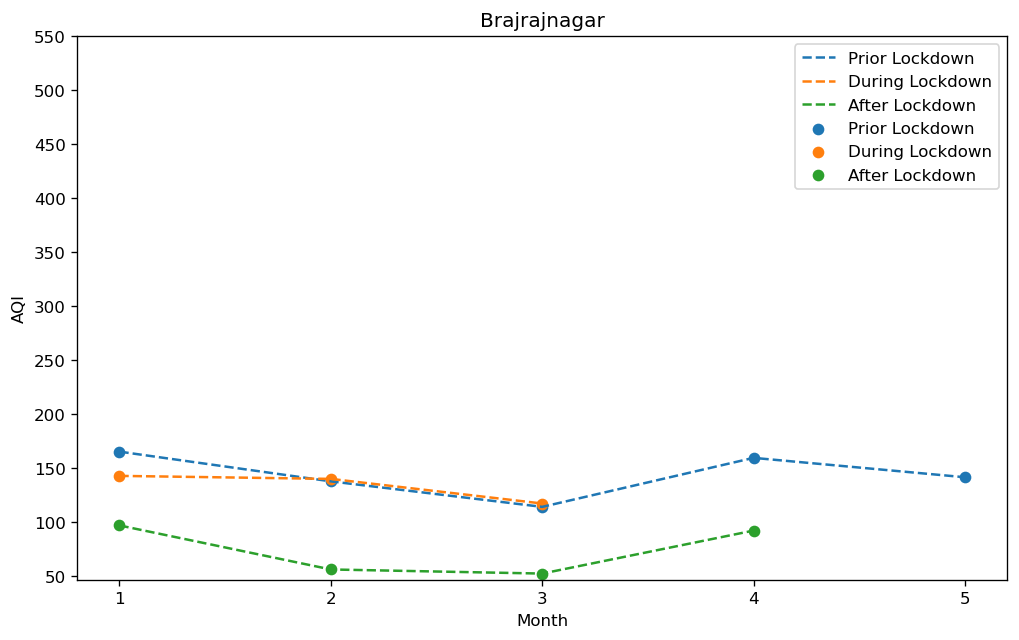

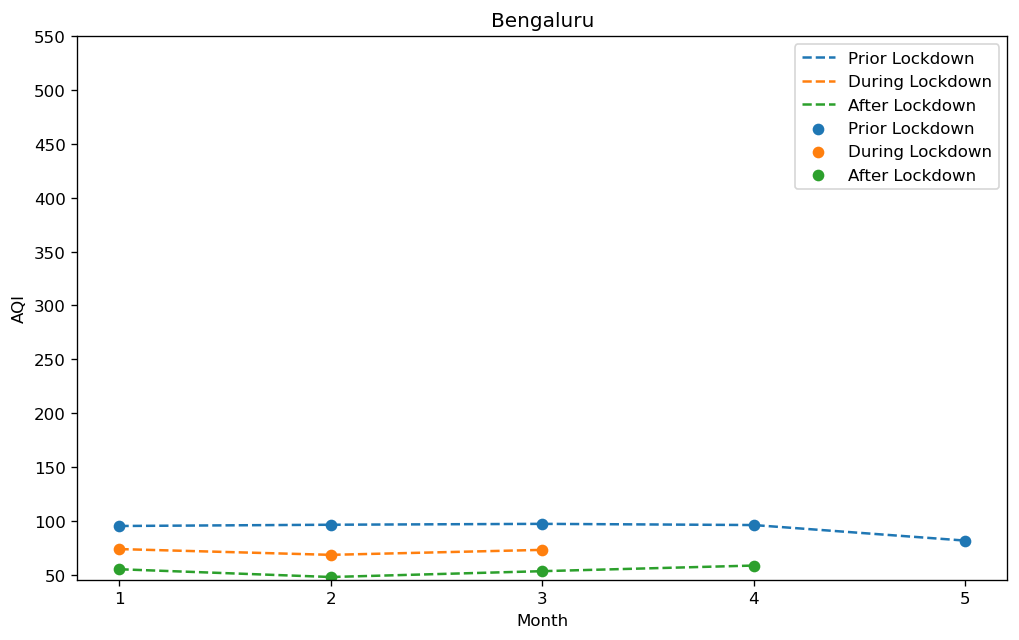

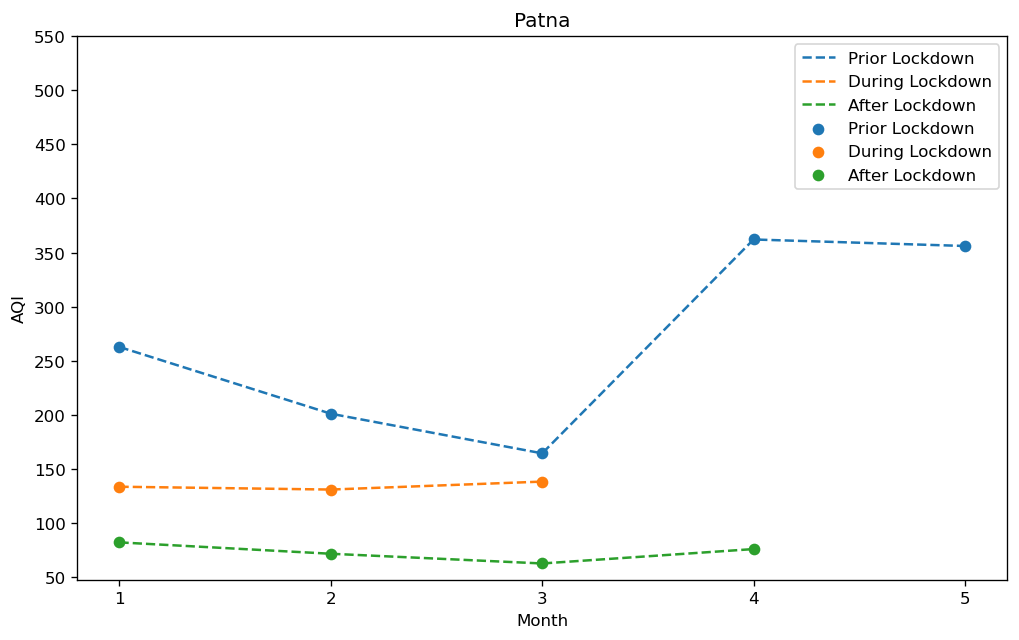

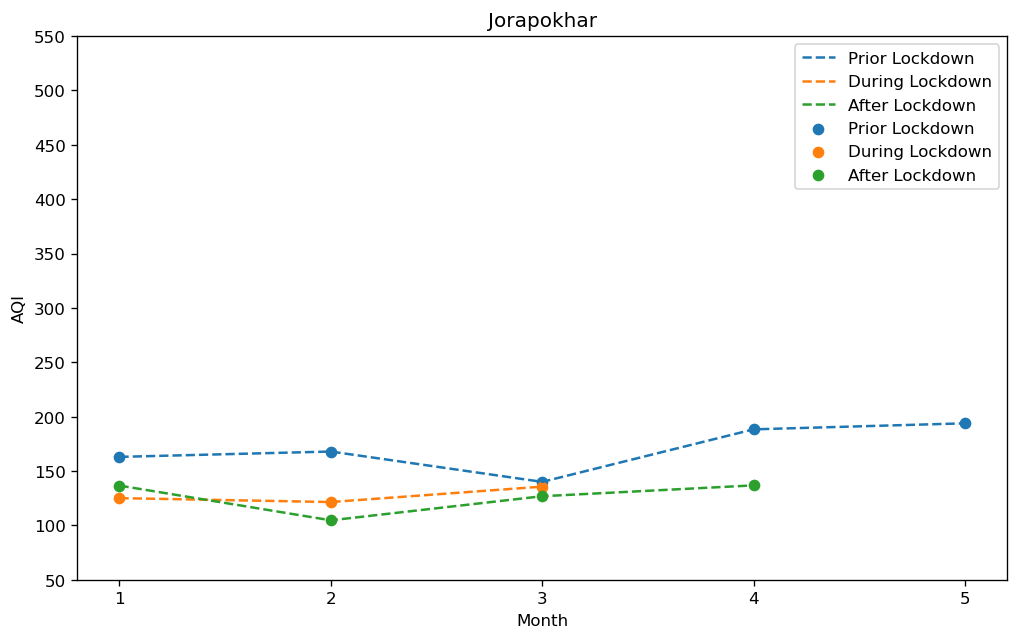

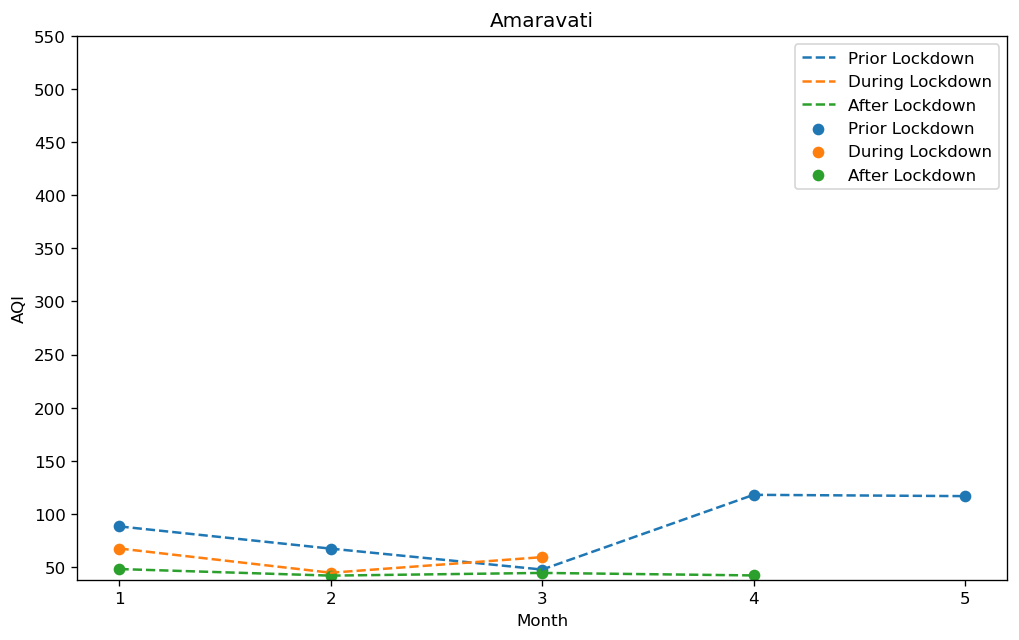

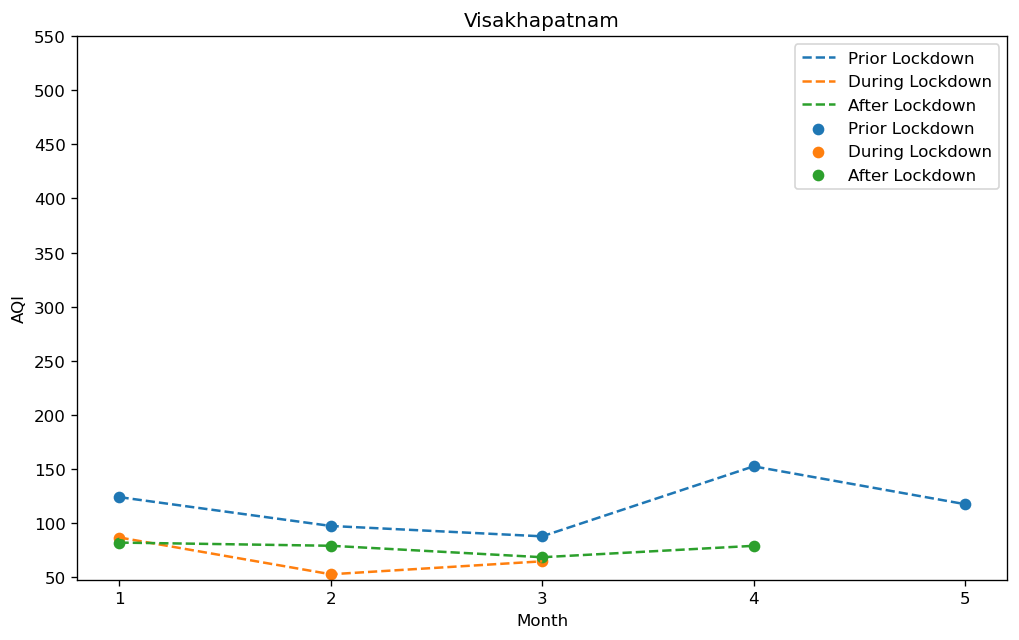

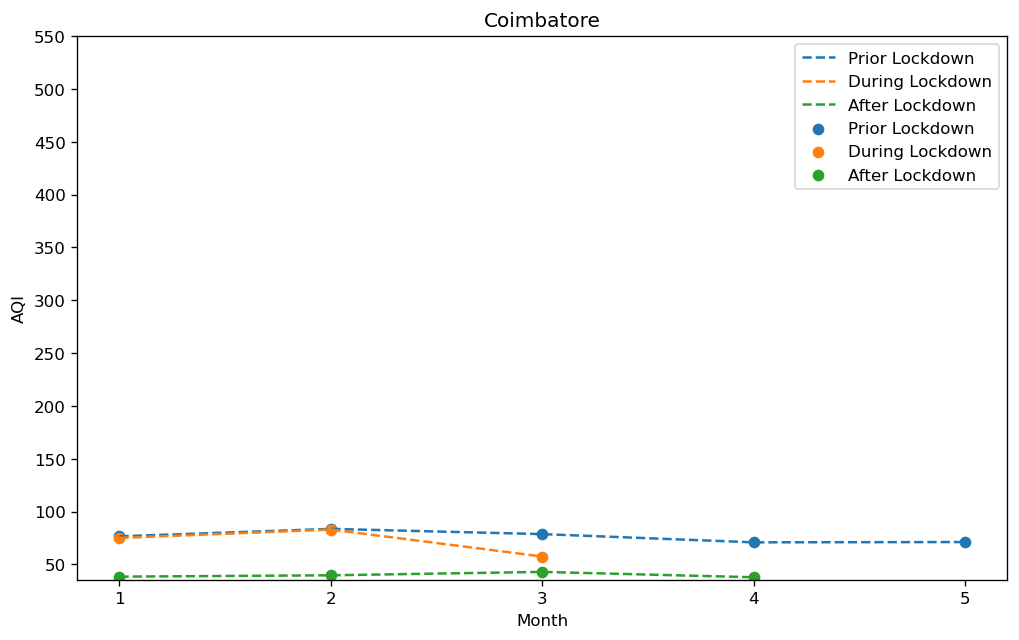

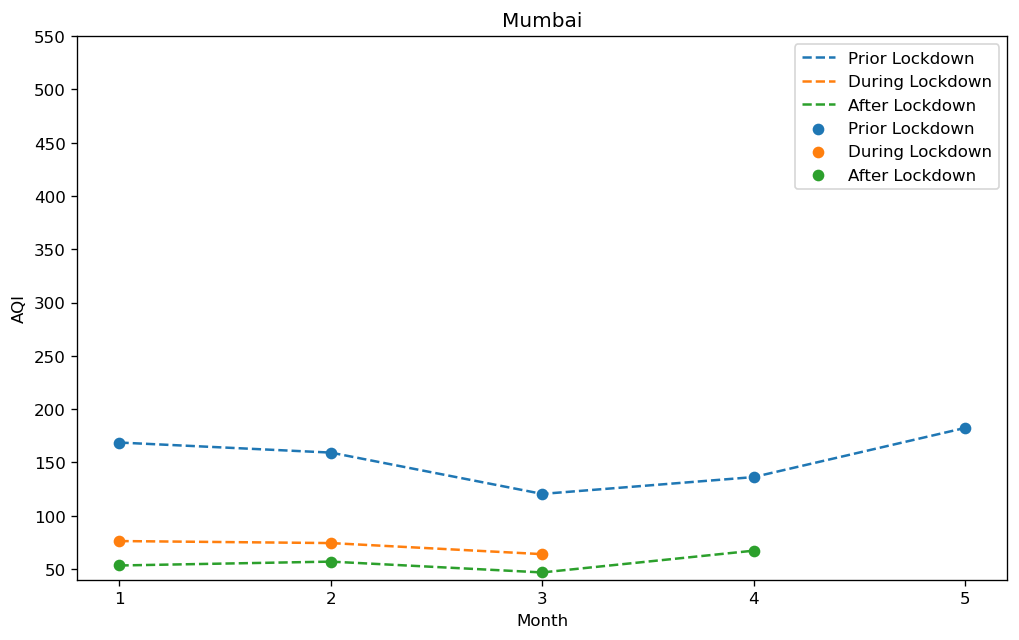

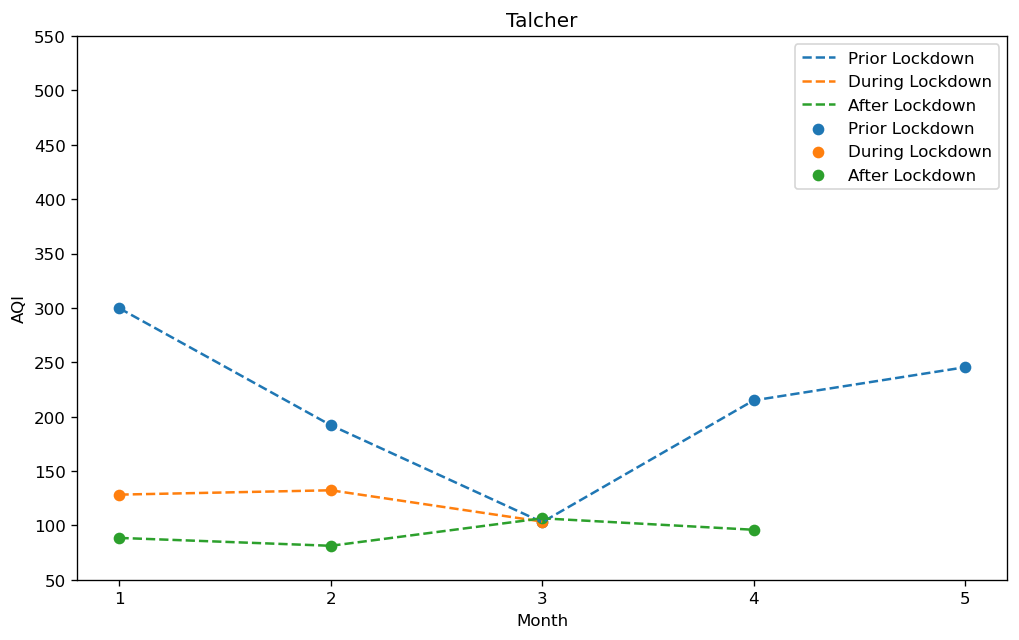

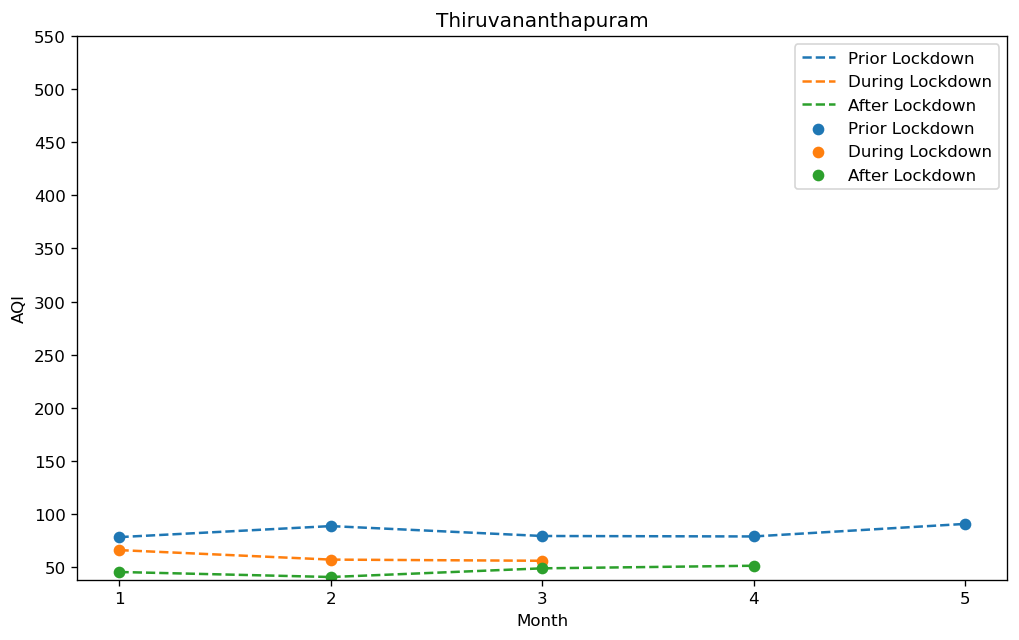

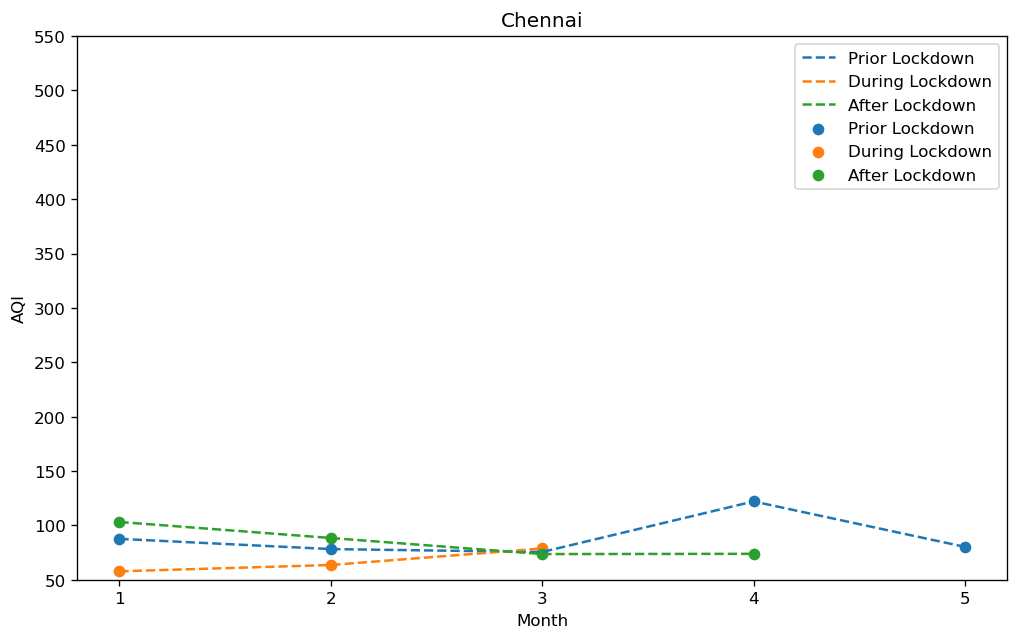

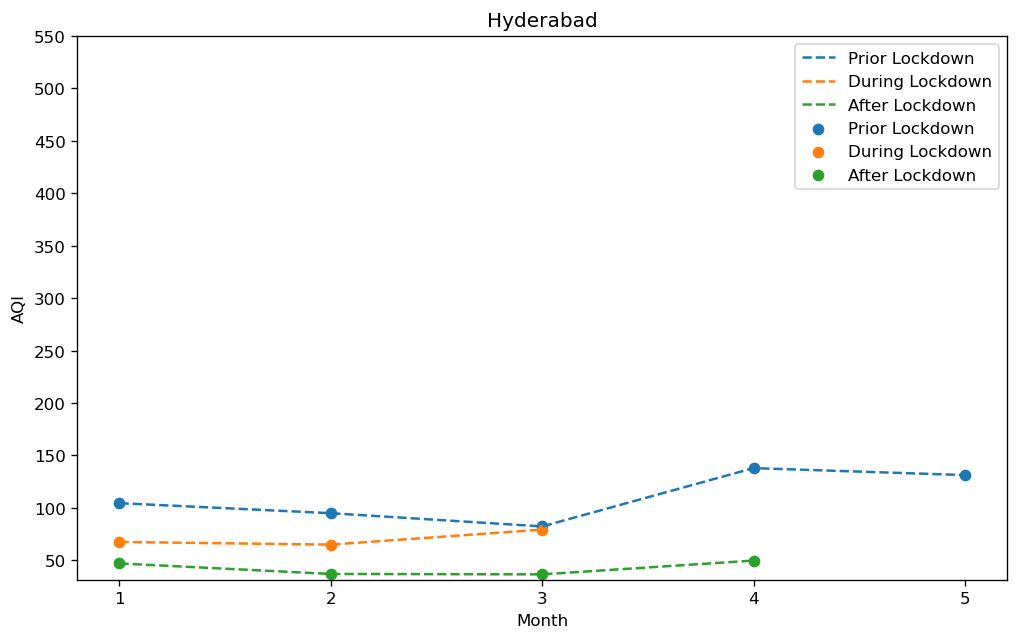

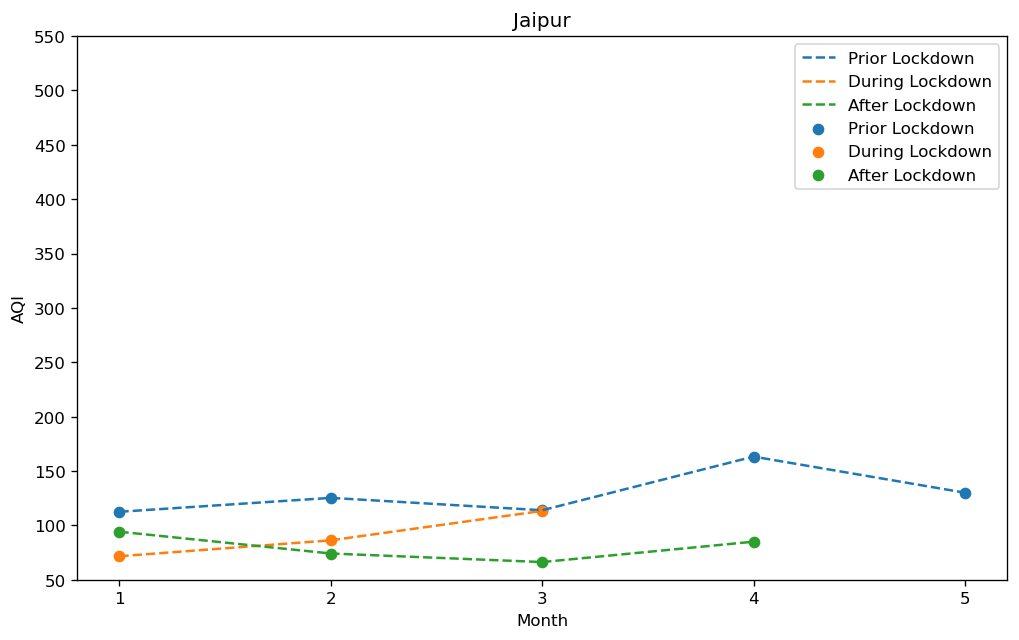

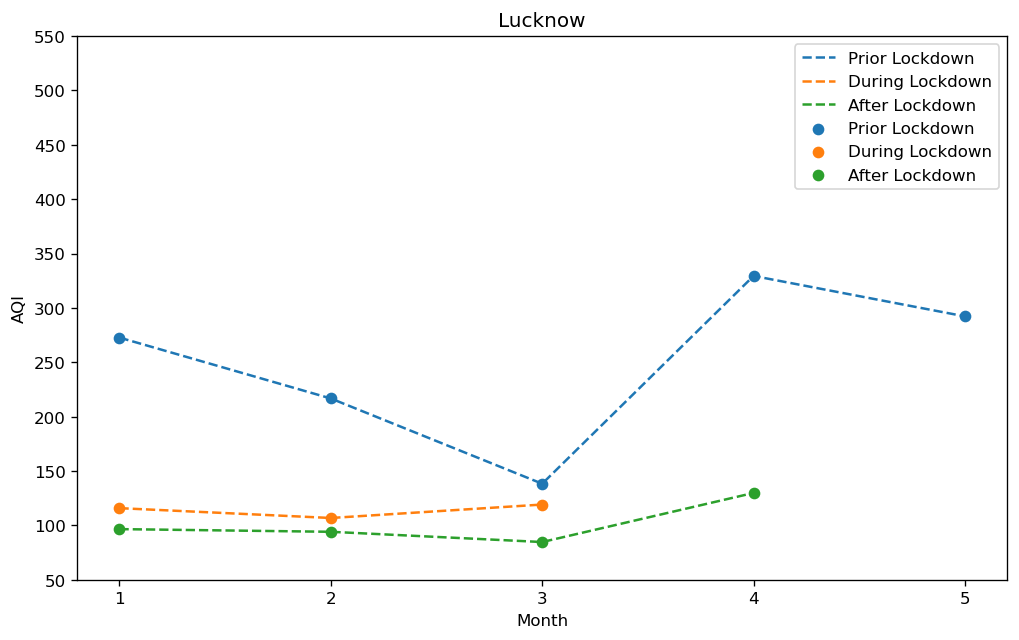

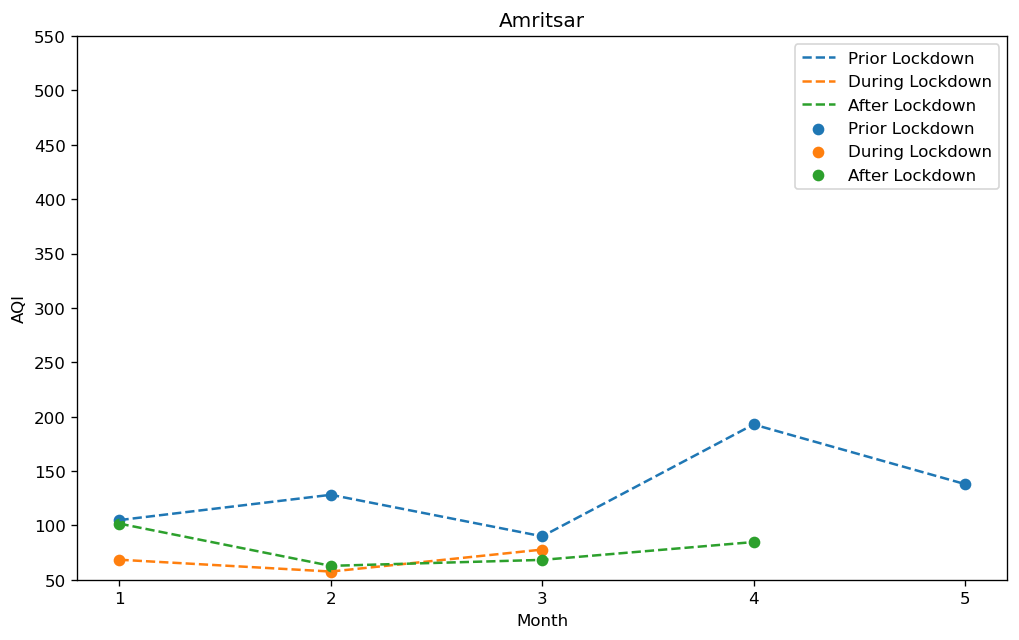

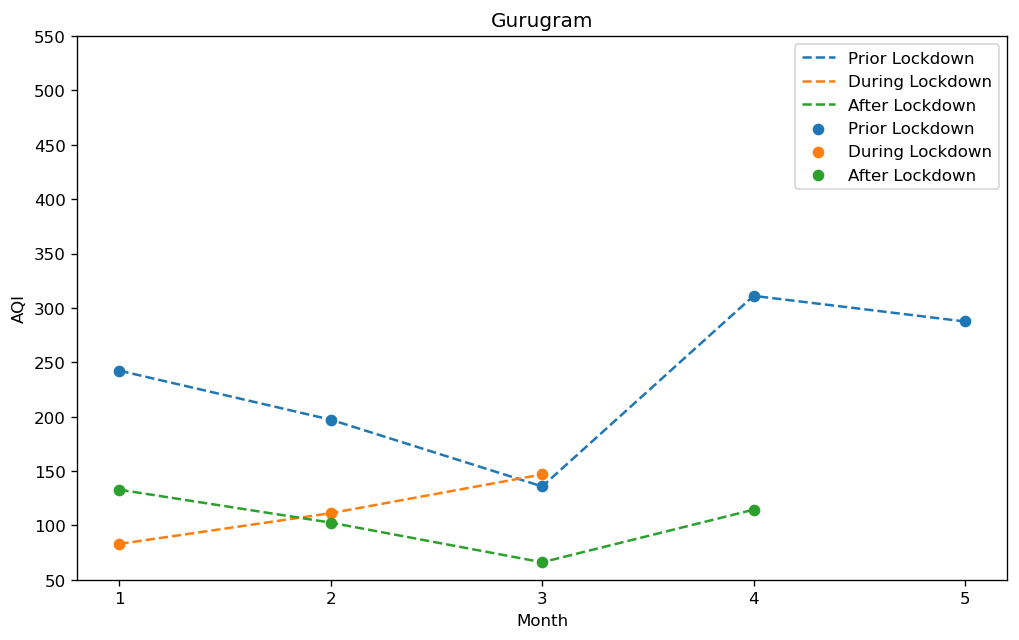

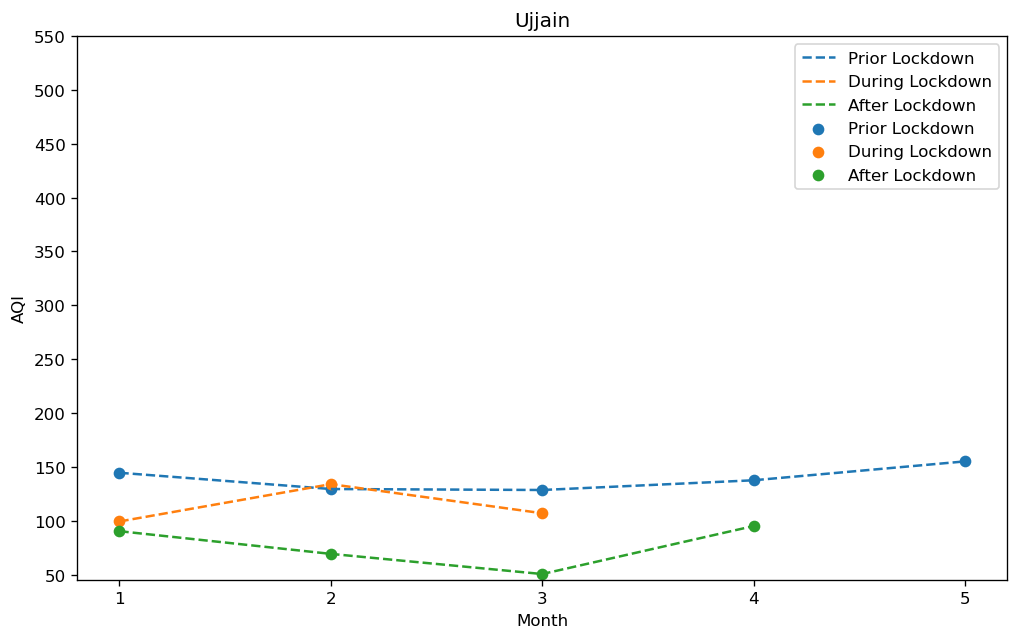

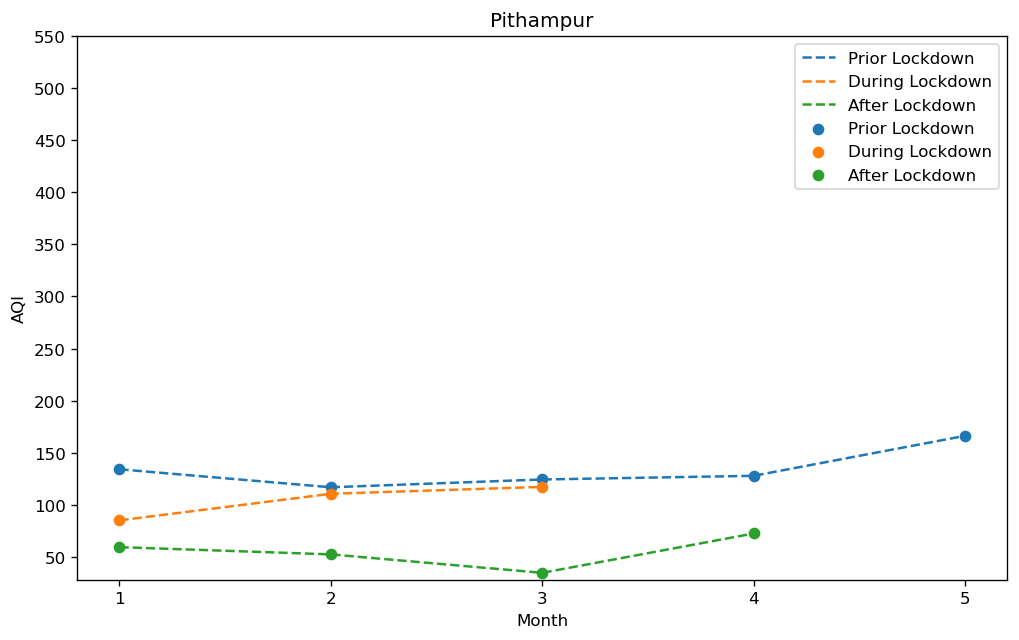

In [34]:
for i in list_cities:

    # Adjusting figure size
    plt.figure(figsize=(10,6))
    plt.rcParams['figure.dpi'] = 120 

    #read csv files to draw plots
    df = pd.read_csv('../aim2/output_month/{}_prior_lockdown.csv'.format(i),header=None)
    df1 = pd.read_csv('../aim2/output_month/{}_in_lockdown.csv'.format(i),header=None)
    df2 = pd.read_csv('../aim2/output_month/{}_after_lockdown.csv'.format(i),header=None)

    
    plt.scatter(df[0], df[1],label="Prior Lockdown")
    plt.plot(df[0], df[1], '--',label="Prior Lockdown") # plot the boundary
    
    plt.scatter(df1[0],df1[1],label = 'During Lockdown')
    plt.plot(df1[0],df1[1],'--',label = 'During Lockdown') # plot the boundary
    
    plt.scatter(df2[0],df2[1],label='After Lockdown')
    plt.plot(df2[0],df2[1],'--',label='After Lockdown') # plot the boundary

    plt.xticks(range(1,6,1)) 
    plt.yticks(range(50,600,50))
    plt.xlabel('Month')
    plt.ylabel('AQI')
    plt.title(i)

    plt.legend()
    plt.savefig('../aim2/Plots_month/{}.jpg'.format(i))
    plt.show()
